# EDA: Credit Card Fraud Data

This notebook performs exploratory data analysis on the bank credit card transaction fraud dataset.

## Objectives
1. Data exploration and understanding
2. Feature analysis (V1-V28 PCA features)
3. Class imbalance analysis
4. Statistical summaries


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from pathlib import Path

warnings.filterwarnings('ignore')

# Set up paths - ensure we're working from the project root
project_root = Path().resolve()
if project_root.name == 'notebooks':
    project_root = project_root.parent
elif (project_root / 'notebooks').exists():
    pass  # Already at project root
else:
    # Try to find project root by looking for data directory
    current = Path().resolve()
    while current != current.parent:
        if (current / 'data').exists():
            project_root = current
            break
        current = current.parent

DATA_DIR = project_root / 'data' / 'raw'
OUTPUT_DIR = project_root / 'outputs' / 'eda' / 'creditcard'
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)  # Create output directory if it doesn't exist

# Print relative paths so output is the same for all team members
print(f"Project root: .")
print(f"Data directory: {DATA_DIR.relative_to(project_root)}")
print(f"Output directory: {OUTPUT_DIR.relative_to(project_root)}")
print(f"Data directory exists: {DATA_DIR.exists()}")

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Helper function to save plots (prints relative path for portability)
def save_plot(fig, filename, dpi=300, bbox_inches='tight'):
    """Save plot to output directory"""
    filepath = OUTPUT_DIR / filename
    fig.savefig(filepath, dpi=dpi, bbox_inches=bbox_inches)
    rel = filepath.relative_to(project_root)
    print(f"Plot saved to: {rel}")

print("Libraries imported successfully!")


Project root: .
Data directory: data\raw
Output directory: outputs\eda\creditcard
Data directory exists: True
Libraries imported successfully!


## 1. Load Data


In [2]:
# Load the credit card data
cc_df = pd.read_csv(DATA_DIR / 'creditcard.csv')

print(f"Dataset Shape: {cc_df.shape}")
print(f"\nColumns: {cc_df.columns.tolist()}")
print("\nFirst few rows:")
cc_df.head()


Dataset Shape: (284807, 31)

Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

First few rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 2. Data Cleaning


In [3]:
# Check for missing values
print("Missing Values:")
print(cc_df.isnull().sum())
print(f"\nTotal missing values: {cc_df.isnull().sum().sum()}")

# Check for duplicates
print(f"\nDuplicate rows: {cc_df.duplicated().sum()}")

# Check data types
print("\nData Types:")
print(cc_df.dtypes)

# Basic info
print("\nDataset Info:")
cc_df.info()


Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Total missing values: 0

Duplicate rows: 1081

Data Types:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64

In [4]:
# Handle missing values if any
if cc_df.isnull().sum().sum() > 0:
    missing_cols = cc_df.columns[cc_df.isnull().any()].tolist()
    print(f"Columns with missing values: {missing_cols}")
    for col in missing_cols:
        missing_pct = (cc_df[col].isnull().sum() / len(cc_df)) * 100
        print(f"{col}: {cc_df[col].isnull().sum()} ({missing_pct:.2f}%)")
        # Document decision on handling strategy
else:
    print("No missing values found!")

# Remove duplicates if any
initial_shape = cc_df.shape
cc_df = cc_df.drop_duplicates()
final_shape = cc_df.shape

if initial_shape[0] != final_shape[0]:
    print(f"\nRemoved {initial_shape[0] - final_shape[0]} duplicate rows")
else:
    print("\nNo duplicates found")
    
print(f"Final dataset shape: {cc_df.shape}")


No missing values found!

Removed 1081 duplicate rows
Final dataset shape: (283726, 31)


## 3. Class Distribution Analysis


Class Distribution:
Non-fraudulent (0): 283,253 (99.8333%)
Fraudulent (1): 473 (0.1667%)

Imbalance Ratio: 598.84:1
Plot saved to: outputs\eda\creditcard\creditcard_class_distribution.png


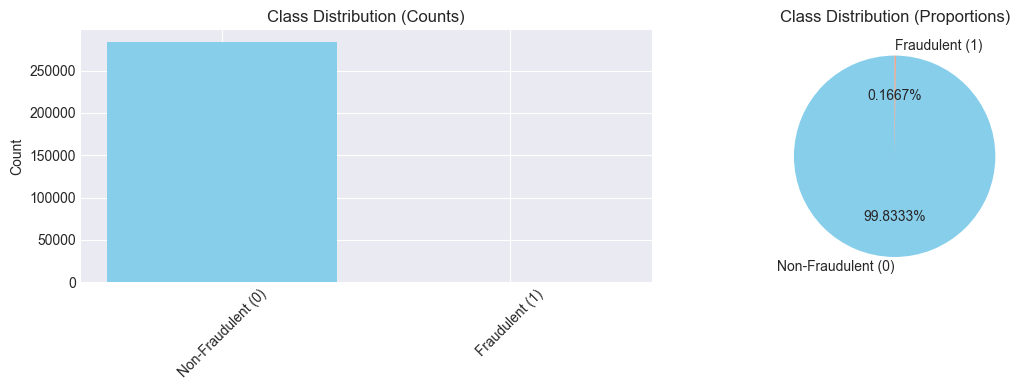

In [5]:
# Analyze class distribution
class_counts = cc_df['Class'].value_counts()
class_proportions = cc_df['Class'].value_counts(normalize=True)

print("Class Distribution:")
print(f"Non-fraudulent (0): {class_counts[0]:,} ({class_proportions[0]*100:.4f}%)")
print(f"Fraudulent (1): {class_counts[1]:,} ({class_proportions[1]*100:.4f}%)")
print(f"\nImbalance Ratio: {class_counts[0]/class_counts[1]:.2f}:1")

# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Count plot
axes[0].bar(['Non-Fraudulent (0)', 'Fraudulent (1)'], class_counts.values, color=['skyblue', 'coral'])
axes[0].set_title('Class Distribution (Counts)')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
axes[1].pie(class_counts.values, labels=['Non-Fraudulent (0)', 'Fraudulent (1)'], 
            autopct='%1.4f%%', startangle=90, colors=['skyblue', 'coral'])
axes[1].set_title('Class Distribution (Proportions)')

plt.tight_layout()
save_plot(fig, 'creditcard_class_distribution.png')
plt.show()


## 4. Feature Analysis


In [6]:
# Summary statistics for all features
print("Summary Statistics:")
print(cc_df.describe())

# Focus on Time and Amount (non-PCA features)
print("\n" + "="*50)
print("Time and Amount Statistics:")
print(cc_df[['Time', 'Amount']].describe())


Summary Statistics:
                Time             V1             V2             V3  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean    94811.077600       0.005917      -0.004135       0.001613   
std     47481.047891       1.948026       1.646703       1.508682   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54204.750000      -0.915951      -0.600321      -0.889682   
50%     84692.500000       0.020384       0.063949       0.179963   
75%    139298.000000       1.316068       0.800283       1.026960   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.002966       0.001828      -0.001139       0.001801   
std         1.414184       1.377008       1.331931       1.227664   
min        -5.683171    -113.743307     -26.160506     -43.557242   
25%        -0

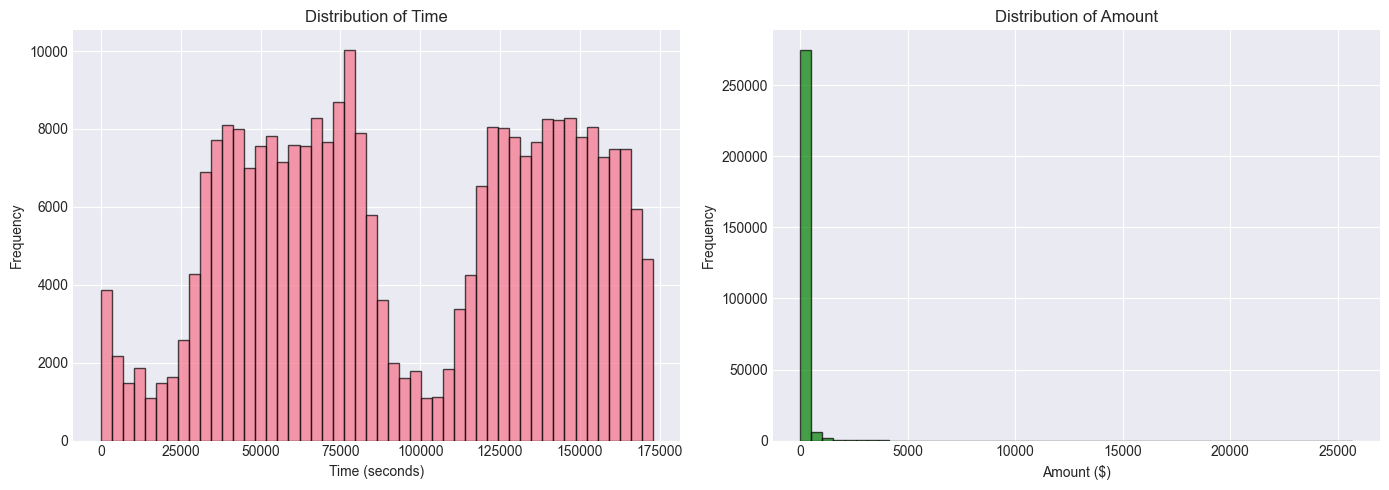

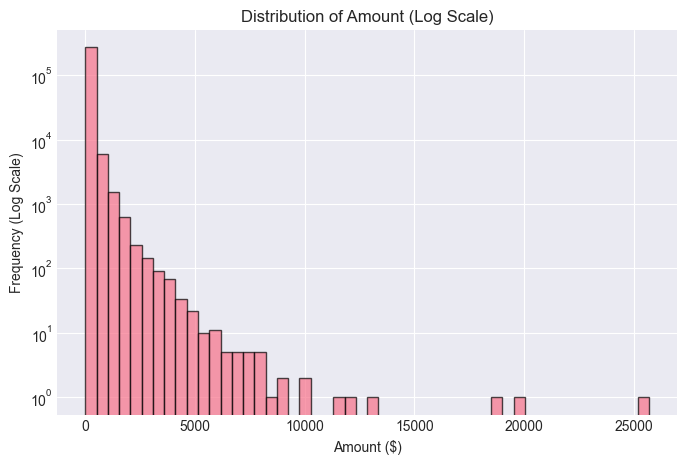

In [7]:
# Distribution of Time and Amount
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Time distribution
axes[0].hist(cc_df['Time'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Time')
axes[0].set_xlabel('Time (seconds)')
axes[0].set_ylabel('Frequency')

# Amount distribution (log scale might be helpful)
axes[1].hist(cc_df['Amount'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1].set_title('Distribution of Amount')
axes[1].set_xlabel('Amount ($)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Log scale for Amount (if needed)
fig, ax = plt.subplots(figsize=(8, 5))
cc_df['Amount'].hist(bins=50, edgecolor='black', alpha=0.7, ax=ax)
ax.set_yscale('log')
ax.set_title('Distribution of Amount (Log Scale)')
ax.set_xlabel('Amount ($)')
ax.set_ylabel('Frequency (Log Scale)')
plt.show()


In [8]:
# Analyze PCA features (V1-V28)
pca_features = [f'V{i}' for i in range(1, 29)]

print(f"Number of PCA features: {len(pca_features)}")
print("\nPCA Features Statistics:")
print(cc_df[pca_features].describe().T.head(10))


Number of PCA features: 28

PCA Features Statistics:
        count      mean       std         min       25%       50%       75%  \
V1   283726.0  0.005917  1.948026  -56.407510 -0.915951  0.020384  1.316068   
V2   283726.0 -0.004135  1.646703  -72.715728 -0.600321  0.063949  0.800283   
V3   283726.0  0.001613  1.508682  -48.325589 -0.889682  0.179963  1.026960   
V4   283726.0 -0.002966  1.414184   -5.683171 -0.850134 -0.022248  0.739647   
V5   283726.0  0.001828  1.377008 -113.743307 -0.689830 -0.053468  0.612218   
V6   283726.0 -0.001139  1.331931  -26.160506 -0.769031 -0.275168  0.396792   
V7   283726.0  0.001801  1.227664  -43.557242 -0.552509  0.040859  0.570474   
V8   283726.0 -0.000854  1.179054  -73.216718 -0.208828  0.021898  0.325704   
V9   283726.0 -0.001596  1.095492  -13.434066 -0.644221 -0.052596  0.595977   
V10  283726.0 -0.001441  1.076407  -24.588262 -0.535578 -0.093237  0.453619   

            max  
V1     2.454930  
V2    22.057729  
V3     9.382558  
V4   

In [9]:
# Check for outliers in PCA features
print("Outliers Analysis (using IQR method):")
for col in pca_features[:5]:  # Check first 5 PCA features
    Q1 = cc_df[col].quantile(0.25)
    Q3 = cc_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = cc_df[(cc_df[col] < lower_bound) | (cc_df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(cc_df)*100:.2f}%)")


Outliers Analysis (using IQR method):
V1: 6948 outliers (2.45%)
V2: 13390 outliers (4.72%)
V3: 3306 outliers (1.17%)
V4: 11094 outliers (3.91%)
V5: 12221 outliers (4.31%)


## 5. Bivariate Analysis


Plot saved to: outputs\eda\creditcard\creditcard_amount_by_class.png


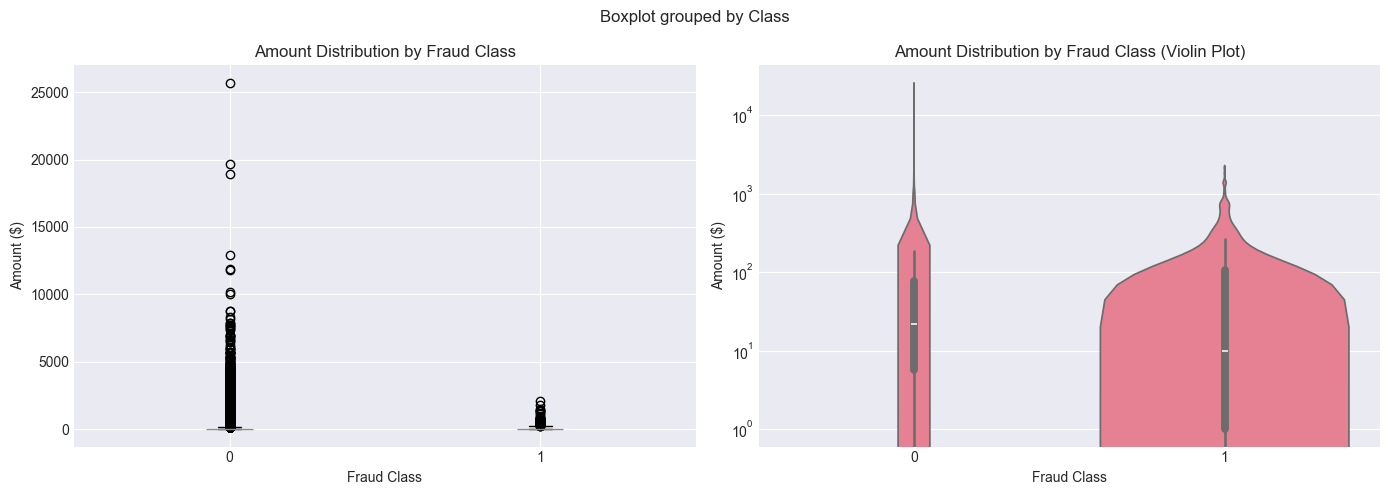


Amount Statistics by Class:
          count        mean         std  min   25%    50%     75%       max
Class                                                                      
0      283253.0   88.413575  250.379023  0.0  5.67  22.00   77.46  25691.16
1         473.0  123.871860  260.211041  0.0  1.00   9.82  105.89   2125.87


In [10]:
# Amount by fraud class
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
cc_df.boxplot(column='Amount', by='Class', ax=axes[0])
axes[0].set_title('Amount Distribution by Fraud Class')
axes[0].set_xlabel('Fraud Class')
axes[0].set_ylabel('Amount ($)')

# Violin plot
sns.violinplot(data=cc_df, x='Class', y='Amount', ax=axes[1])
axes[1].set_title('Amount Distribution by Fraud Class (Violin Plot)')
axes[1].set_xlabel('Fraud Class')
axes[1].set_ylabel('Amount ($)')
axes[1].set_yscale('log')  # Log scale for better visualization

plt.tight_layout()
save_plot(fig, 'creditcard_amount_by_class.png')
plt.show()

# Statistical summary by class
print("\nAmount Statistics by Class:")
print(cc_df.groupby('Class')['Amount'].describe())


Plot saved to: outputs\eda\creditcard\creditcard_time_by_class.png


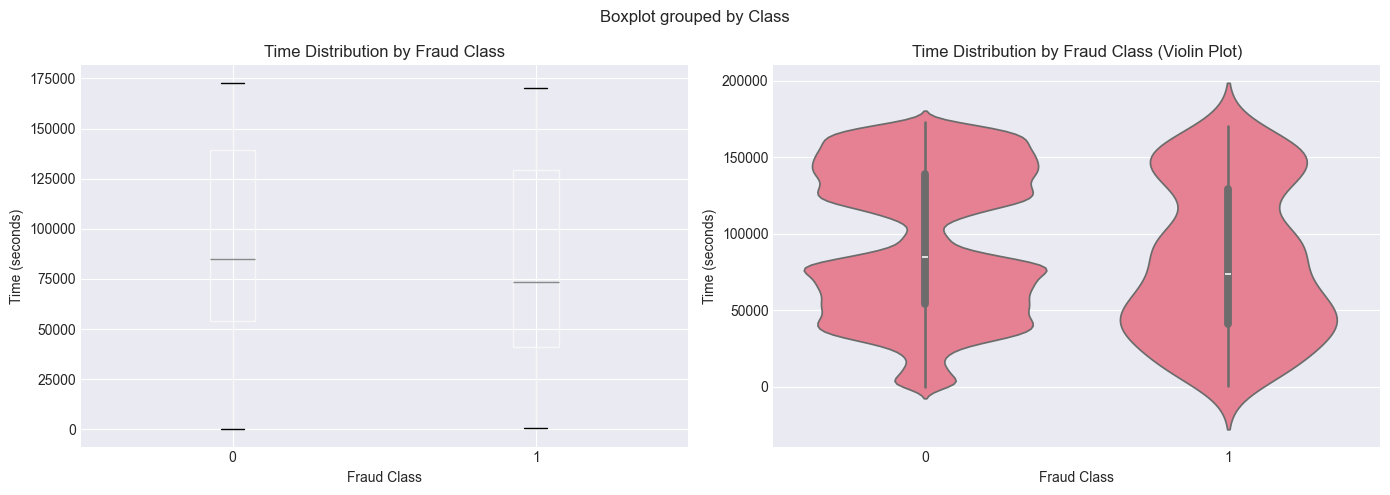


Time Statistics by Class:
          count          mean           std    min      25%      50%  \
Class                                                                  
0      283253.0  94835.058093  47475.550607    0.0  54233.0  84711.0   
1         473.0  80450.513742  48636.179973  406.0  41203.0  73408.0   

            75%       max  
Class                      
0      139308.0  172792.0  
1      129095.0  170348.0  


In [11]:
# Time by fraud class
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

cc_df.boxplot(column='Time', by='Class', ax=axes[0])
axes[0].set_title('Time Distribution by Fraud Class')
axes[0].set_xlabel('Fraud Class')
axes[0].set_ylabel('Time (seconds)')

sns.violinplot(data=cc_df, x='Class', y='Time', ax=axes[1])
axes[1].set_title('Time Distribution by Fraud Class (Violin Plot)')
axes[1].set_xlabel('Fraud Class')
axes[1].set_ylabel('Time (seconds)')

plt.tight_layout()
save_plot(fig, 'creditcard_time_by_class.png')
plt.show()

print("\nTime Statistics by Class:")
print(cc_df.groupby('Class')['Time'].describe())


Plot saved to: outputs\eda\creditcard\creditcard_pca_features_by_class.png


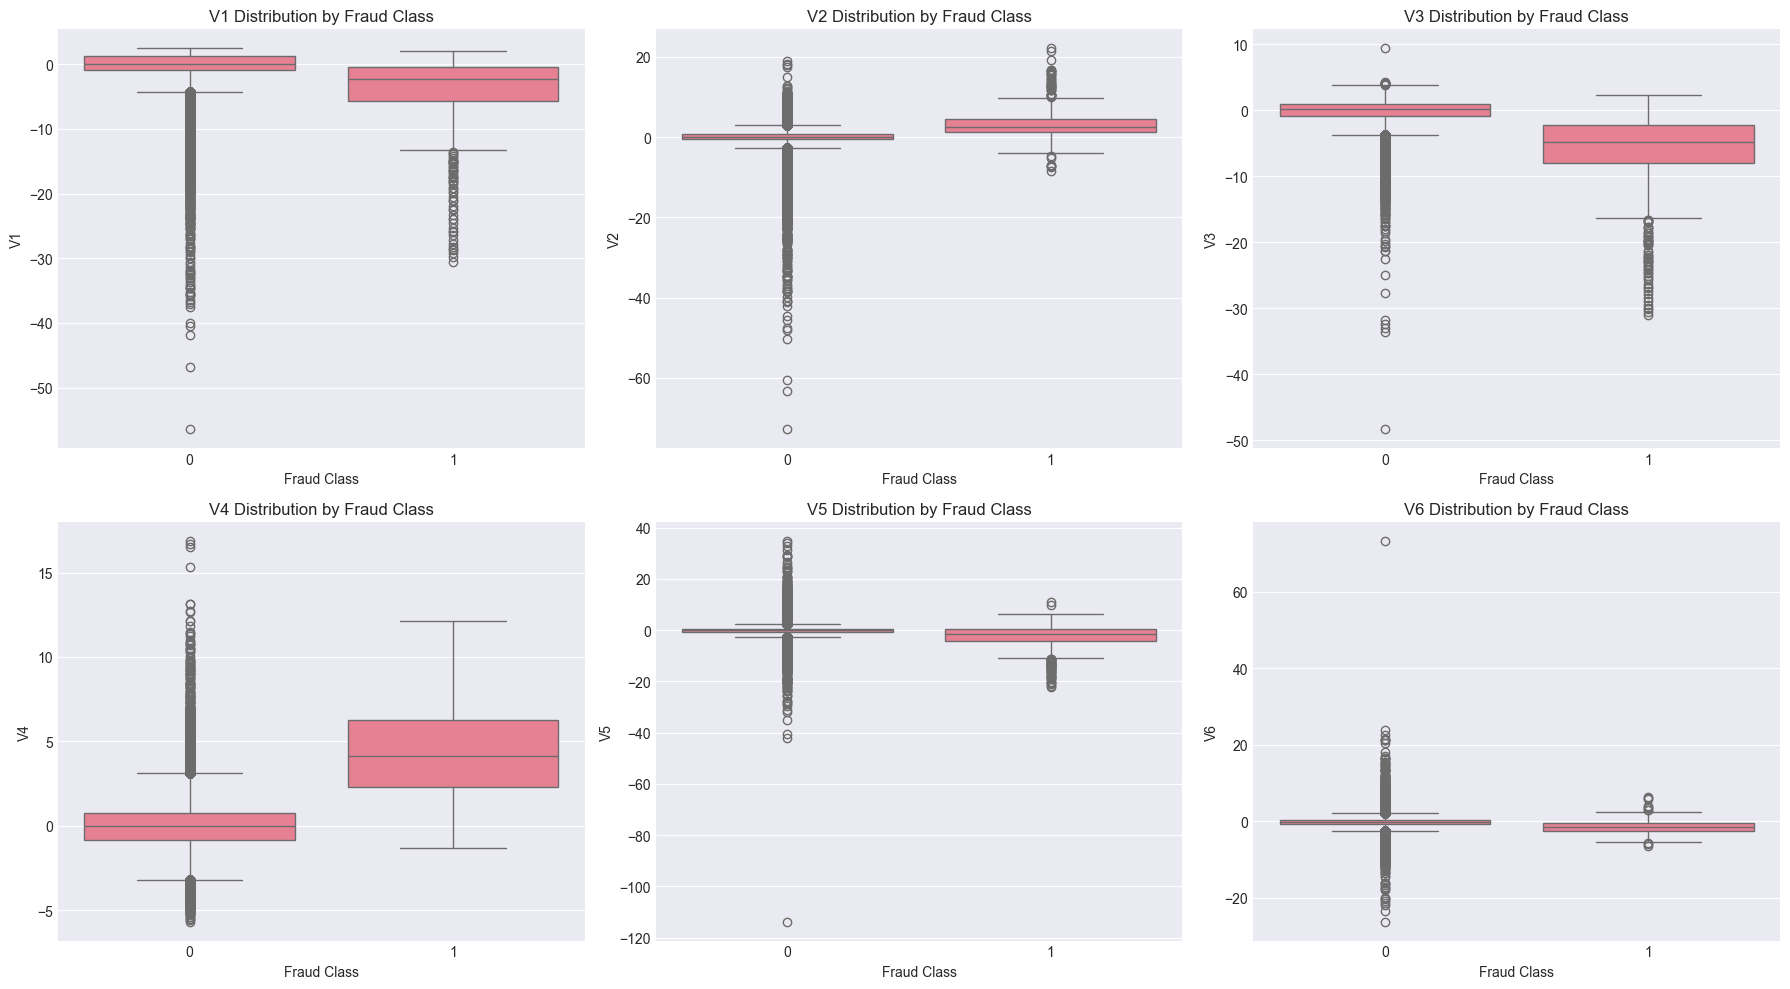

In [12]:
# Analyze PCA features by class (sample a few features)
sample_pca_features = pca_features[:6]  # Analyze first 6 PCA features

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, feature in enumerate(sample_pca_features):
    sns.boxplot(data=cc_df, x='Class', y=feature, ax=axes[idx])
    axes[idx].set_title(f'{feature} Distribution by Fraud Class')
    axes[idx].set_xlabel('Fraud Class')
    axes[idx].set_ylabel(feature)

plt.tight_layout()
save_plot(fig, 'creditcard_pca_features_by_class.png')
plt.show()


## 6. Correlation Analysis


Features Correlated with Class (Target):
Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
Name: Class, dtype: float64
Plot saved to: outputs\eda\creditcard\creditcard_correlation_analysis.png


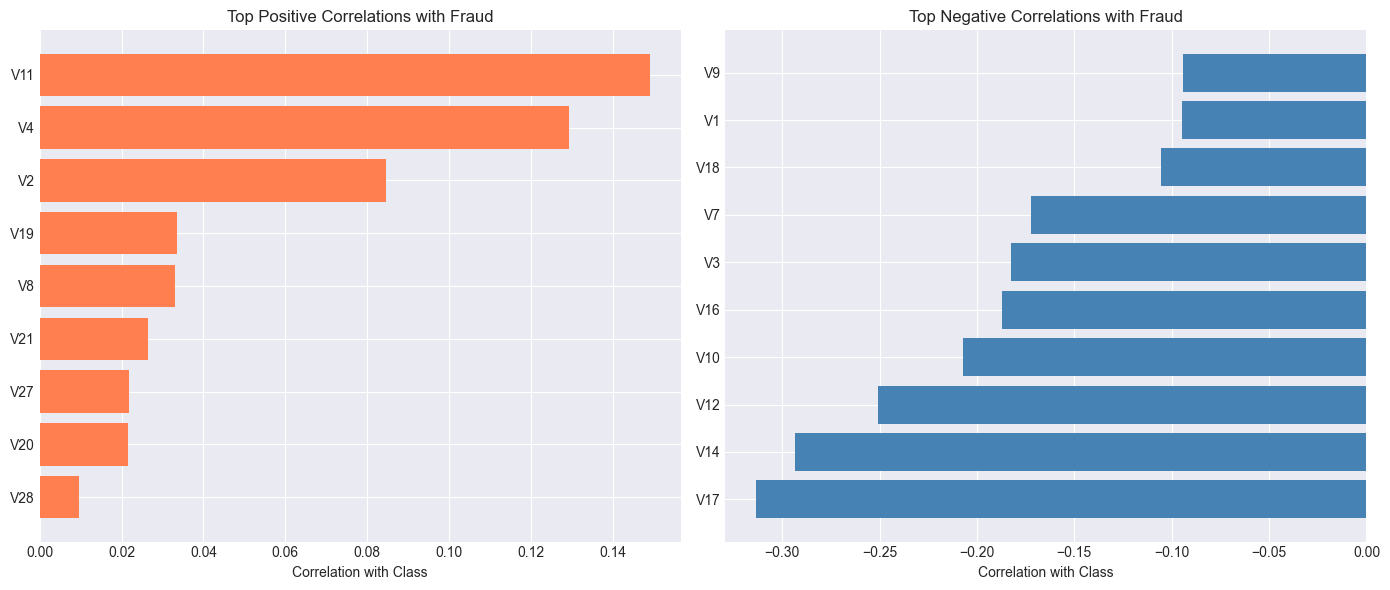

In [13]:
# Correlation matrix (sample for visualization - full matrix might be too large)
# Focus on correlation with target variable
correlations = cc_df.corr()['Class'].sort_values(ascending=False)

print("Features Correlated with Class (Target):")
print(correlations)

# Visualize top correlations
top_corr = correlations.head(10).tail(9)  # Exclude Class itself
bottom_corr = correlations.tail(10)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].barh(range(len(top_corr)), top_corr.values, color='coral')
axes[0].set_yticks(range(len(top_corr)))
axes[0].set_yticklabels(top_corr.index)
axes[0].set_xlabel('Correlation with Class')
axes[0].set_title('Top Positive Correlations with Fraud')
axes[0].invert_yaxis()

axes[1].barh(range(len(bottom_corr)), bottom_corr.values, color='steelblue')
axes[1].set_yticks(range(len(bottom_corr)))
axes[1].set_yticklabels(bottom_corr.index)
axes[1].set_xlabel('Correlation with Class')
axes[1].set_title('Top Negative Correlations with Fraud')
axes[1].invert_yaxis()

plt.tight_layout()
save_plot(fig, 'creditcard_correlation_analysis.png')
plt.show()


## 7. Summary and Next Steps

### Key Findings:
1. **Class Imbalance**: [Document the extreme imbalance ratio found]
2. **Missing Values**: [Document any missing values and handling strategy]
3. **Key Patterns**: [Document any notable patterns in PCA features, Amount, Time]
4. **Feature Correlations**: [Document important correlations with target]

### Next Steps:
- Feature engineering (if needed)
- Data transformation (scaling)
- Handle class imbalance for modeling
